<a href="https://colab.research.google.com/github/CHYaswanth/SVHN-Image-classification/blob/master/SVHN_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVHN Image Classification
(The Street View House Numbers)

### Data Description:
The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). 
SVHN is obtained from house numbers in Google Street View images.

This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a
large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

Each image is 32 pixels in height and 32 pixels in width, for a total of 1024 pixels.Each pixel has a single pixel-value associated with it. This pixel-value is an integer between 0 and 255.

#### Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

### Objective:
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network.

In [137]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
#Initialize the random number generator
import random
random.seed(100)

#### Checking GPU allotment

In [3]:
from tensorflow import keras
tf.test.gpu_device_name()

'/device:GPU:0'

#### Mounting Drive

In [4]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Loading the DataSet

In [5]:
import h5py
import numpy as np

#open file as readonly
h5f = h5py.File('/content/drive/My Drive/Neural Net Project/SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

#close file
h5f.close()

In [7]:
print('X train shape : ', X_train.shape)
print('y train shape : ', y_train.shape)
print('\n')

print('X val shape : ', X_val.shape)
print('y val shape : ', y_val.shape)
print('\n')

print('X test shape : ', X_test.shape)
print('y test shape : ', y_test.shape)
print('\n')

X train shape :  (42000, 32, 32)
y train shape :  (42000,)


X val shape :  (60000, 32, 32)
y val shape :  (60000,)


X test shape :  (18000, 32, 32)
y test shape :  (18000,)




### Visualizing the DataSet

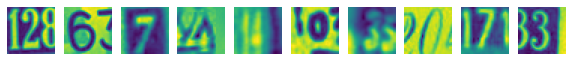

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# visualizing the first 10 images in the Train set and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

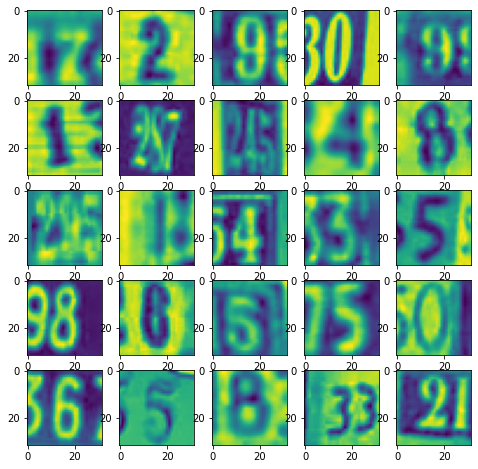

In [9]:
# visualizing the test set images
fig=plt.figure(figsize=(8, 8))
columns=5
rows=5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Data PreProcessing

In [0]:
# Changing dimensions to N x D = 32x32

X_tr = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2])
X_te = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2])
X_va = X_val.reshape(len(X_val), X_val.shape[1] * X_val.shape[2])

In [11]:
print('Shapes of test/train/validation sets:')
print('Test :', X_tr.shape)
print('Test :', X_te.shape)
print('Test :', X_va.shape)

Shapes of test/train/validation sets:
Test : (42000, 1024)
Test : (18000, 1024)
Test : (60000, 1024)


In [0]:
# normalizing input from 0-255 to 0-1

X_tr = X_tr / 255.0
X_te = X_te / 255.0
X_va = X_va /255.0

In [0]:
# converting y data into categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)
y_va = to_categorical(y_val)

In [17]:
# combining train & val sets to add more samples to train our model.
Xf_train = np.concatenate((X_tr,X_va))
yf_train = np.concatenate((y_tr, y_va))

print(Xf_train.shape, yf_train.shape)

(102000, 1024) (102000, 10)


In [0]:
# Seperating 30% of the combined samples as validation set.

from sklearn.model_selection import train_test_split

Xf_tr, Xf_va, yf_tr, yf_va = train_test_split(Xf_train,yf_train, test_size=0.3, random_state=100)

In [19]:
print('Final Shape of the train/test/val sets:')
print(Xf_tr.shape, X_te.shape, Xf_va.shape)
print(yf_tr.shape, y_te.shape,yf_va.shape)

Final Shape of the train/test/val sets:
(71400, 1024) (18000, 1024) (30600, 1024)
(71400, 10) (18000, 10) (30600, 10)


## Useful Functions

In [0]:
# Plotting the train/ validation loss

def plot_loss(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.title('Loss for train/val sets')
  plt.ylabel('Loss')
  plt.xlabel(' # of epoch')
  plt.legend(loc="upper left")

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='val')
  plt.title('Accuracy for train/val sets')
  plt.ylabel('Accuracy')
  plt.xlabel(' # of epoch')
  plt.legend(loc="upper left")

#1. Basic NN

### Architecture

**Layer in Network (No.of Neurons in the layer)**  
Input Layer (1024) -> Layer 1 (500) -> Layer 2 (250) -> Layer 3 (100) -> Layer 4 (50) ->  Output Layer (10)   


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import callbacks

## Function for NN Model

In [0]:
def NN_model(iterations, lr=0.01, activation='sigmoid', optimizer='SGD', initializer='GlorotNormal', verb=True, evaluate=False, plot=True):

    ## parameters
    iterations = iterations
    learning_rate = lr
    activation_fn = activation
    initializer_fn = initializer
    opt_algo = optimizer
    
    #useful varibales.
    returns = []
    verbose = 0
    output_nodes = 10

    if(verb):
      verbose = 1
    
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), kernel_initializer=initializer_fn,activation=activation_fn))
    model.add(Dense(250, kernel_initializer=initializer_fn, activation=activation_fn))
    model.add(Dense(100, kernel_initializer=initializer_fn, activation=activation_fn))
    model.add(Dense(50, kernel_initializer=initializer_fn, activation=activation_fn))
    model.add(Dense(output_nodes, activation='softmax'))
    
    ## optimizer 1
    sgd = optimizers.SGD(lr=learning_rate,decay=1e-6, momentum=0.9)
    
    ## optimizer 2
    adam = optimizers.Adam(lr=learning_rate)

    if(opt_algo == 'SGD'):
      opt_algo = sgd
    else:
      opt_algo = adam

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt_algo, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(Xf_tr, yf_tr, epochs=iterations, batch_size=200, validation_data=(Xf_va,yf_va), verbose=verbose)
    returns.append(history)
    #print("\n")
    if(plot):
      plt.figure(figsize=(15,5))
      plt.subplot(1,2,1)
      plot_loss(history)

      plt.subplot(1,2,2)
      plot_accuracy(history)
      plt.show()

    if(evaluate):
      # model evaluation
      score = model.evaluate(X_te, y_te, verbose=0)
      returns.append(score)
    else:
      score = model.evaluate(Xf_va, yf_va, verbose=0)
      returns.append(score)

    return returns

## a. Basic Neural network

lr = 0.01  
 activation = 'sigmoid'  
optimizer = SGD  
intializer = default (Xavier initializer)  




Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3107 - accuracy: 0.1012 - val_loss: 2.3063 - val_accuracy: 0.0991
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3044 - accuracy: 0.0993 - val_loss: 2.3052 - val_accuracy: 0.0978
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.0999 - val_loss: 2.3036 - val_accuracy: 0.0993
Epoch 4/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3043 - accuracy: 0.0997 - val_loss: 2.3038 - val_accuracy: 0.0978
Epoch 5/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.1003 - val_loss: 2.3034 - val_accuracy: 0.0999
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3040 - accuracy: 0.1009 - val_loss: 2.3042 - val_accuracy: 0.0978
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3044 - accuracy: 0.0988 - val_loss: 2.3033 - val_accuracy: 0.0991
Epoch 

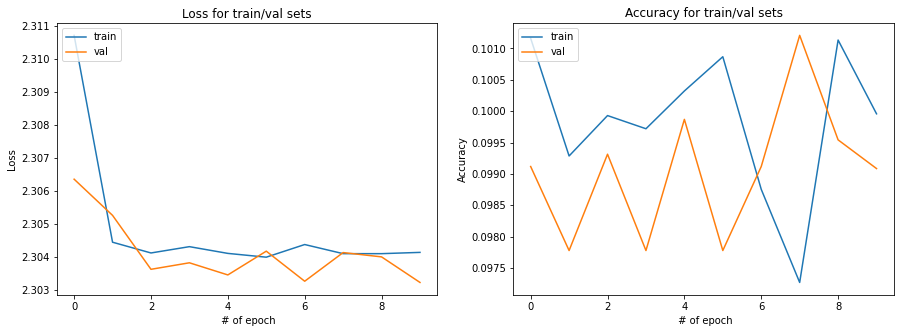

 [2.303215265274048, 0.09908496588468552]]

In [26]:
NN_model(iterations=10)

**Train accuracy ~ 10 % is expected for un-trianed model as No.of output classes = 10.   so model architecture of fine.**  



#### Sanity check

with a high learning rate loss should shoot up.

Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2014.0195 - accuracy: 0.0988 - val_loss: 1919.5015 - val_accuracy: 0.0991
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 2331.8035 - accuracy: 0.1009 - val_loss: 2148.1931 - val_accuracy: 0.1012
Epoch 3/10
357/357 [==============================] - 1s 4ms/step - loss: 2212.4380 - accuracy: 0.0999 - val_loss: 1928.9436 - val_accuracy: 0.1012
Epoch 4/10
357/357 [==============================] - 1s 4ms/step - loss: 2050.0420 - accuracy: 0.0993 - val_loss: 1708.7404 - val_accuracy: 0.0991
Epoch 5/10
357/357 [==============================] - 1s 4ms/step - loss: 2179.8145 - accuracy: 0.0987 - val_loss: 2351.7231 - val_accuracy: 0.0987
Epoch 6/10
357/357 [==============================] - 1s 4ms/step - loss: 1988.6945 - accuracy: 0.1012 - val_loss: 3373.8066 - val_accuracy: 0.0999
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 2253.7520 - accuracy: 0.1015 - val_los

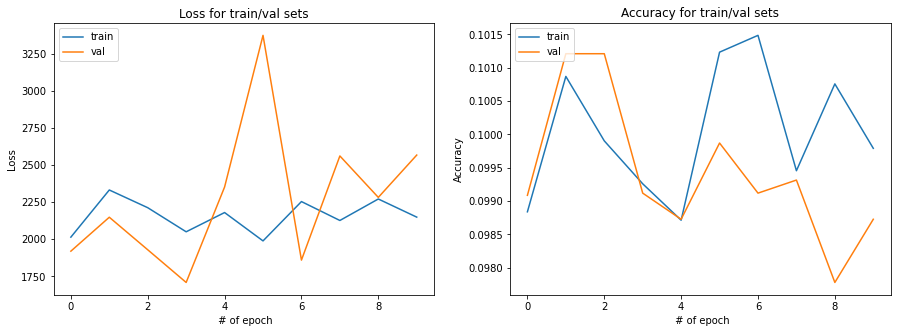

 [2567.07763671875, 0.09872549027204514]]

In [27]:
NN_model(iterations=10,lr=100)

As expected loss has shooted up..  
So our model is performing as expected. 



## b. With RELU activation


Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2.1582 - accuracy: 0.2113 - val_loss: 1.7994 - val_accuracy: 0.3368
Epoch 2/10
357/357 [==============================] - 1s 4ms/step - loss: 1.4412 - accuracy: 0.5212 - val_loss: 1.2485 - val_accuracy: 0.5962
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 1.1244 - accuracy: 0.6456 - val_loss: 1.0047 - val_accuracy: 0.6890
Epoch 4/10
357/357 [==============================] - 1s 3ms/step - loss: 0.9720 - accuracy: 0.6978 - val_loss: 0.9270 - val_accuracy: 0.7173
Epoch 5/10
357/357 [==============================] - 1s 3ms/step - loss: 0.8862 - accuracy: 0.7239 - val_loss: 0.8499 - val_accuracy: 0.7380
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 0.8111 - accuracy: 0.7488 - val_loss: 0.8671 - val_accuracy: 0.7319
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 0.7547 - accuracy: 0.7666 - val_loss: 0.7542 - val_accuracy: 0.7665
Epoch 

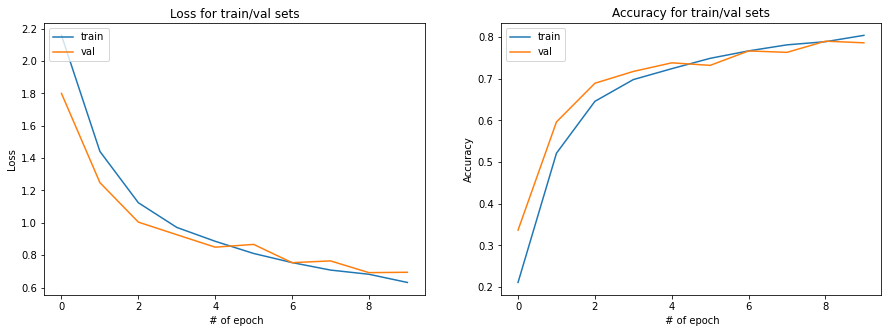

Model Accuracy is :  78.59804034233093


In [28]:
model = NN_model(iterations=10,activation='relu')
print('Model Accuracy is : ', model[1][1]*100) 

We notice model performs much better with relu.  
Loss has come down and accuracy has gone up significantly.  
We will continue to use RELU activation for this case study.


## c. With optimizer as Adam

Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2.1710 - accuracy: 0.1753 - val_loss: 1.7498 - val_accuracy: 0.3725
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 1.4343 - accuracy: 0.5235 - val_loss: 1.1884 - val_accuracy: 0.6211
Epoch 3/10
357/357 [==============================] - 1s 4ms/step - loss: 1.1243 - accuracy: 0.6448 - val_loss: 1.1187 - val_accuracy: 0.6359
Epoch 4/10
357/357 [==============================] - 1s 3ms/step - loss: 1.0155 - accuracy: 0.6816 - val_loss: 0.9503 - val_accuracy: 0.7044
Epoch 5/10
357/357 [==============================] - 1s 4ms/step - loss: 0.9063 - accuracy: 0.7177 - val_loss: 0.8800 - val_accuracy: 0.7271
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 0.8424 - accuracy: 0.7415 - val_loss: 0.8659 - val_accuracy: 0.7278
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 0.7997 - accuracy: 0.7533 - val_loss: 0.7961 - val_accuracy: 0.7532
Epoch 

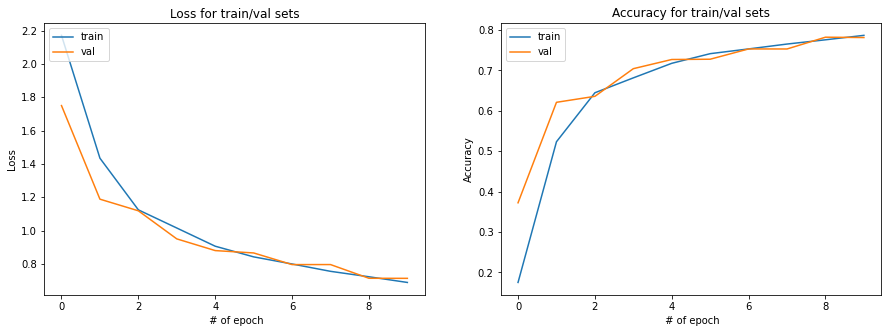

Model Accuracy is :  78.14379334449768


In [29]:
model = NN_model(10, lr=0.001, activation='relu', optimizer='adam')
print('Model Accuracy is : ', model[1][1]*100) 

## d. With 'he_normal' initializer

### 1. with Adam

Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2.1332 - accuracy: 0.2052 - val_loss: 1.6224 - val_accuracy: 0.4473
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 1.3541 - accuracy: 0.5600 - val_loss: 1.1462 - val_accuracy: 0.6362
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 1.0559 - accuracy: 0.6726 - val_loss: 0.9734 - val_accuracy: 0.6997
Epoch 4/10
357/357 [==============================] - 1s 4ms/step - loss: 0.9281 - accuracy: 0.7112 - val_loss: 0.8815 - val_accuracy: 0.7244
Epoch 5/10
357/357 [==============================] - 1s 3ms/step - loss: 0.8449 - accuracy: 0.7373 - val_loss: 0.8321 - val_accuracy: 0.7424
Epoch 6/10
357/357 [==============================] - 1s 4ms/step - loss: 0.7859 - accuracy: 0.7554 - val_loss: 0.7932 - val_accuracy: 0.7570
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 0.7364 - accuracy: 0.7732 - val_loss: 0.7690 - val_accuracy: 0.7606
Epoch 

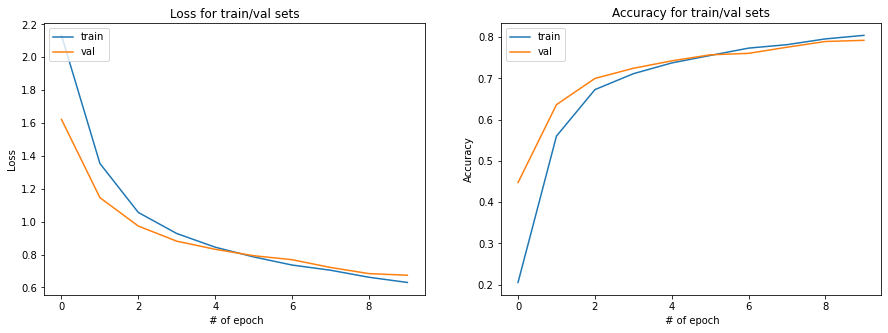

Model Accuracy is :  79.21568751335144


In [30]:
model = NN_model(10, lr=0.001, activation='relu', initializer='he_normal',optimizer='adam')
print('Model Accuracy is : ', model[1][1]*100) 

### 2. With SGD

Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 1.9267 - accuracy: 0.3171 - val_loss: 1.3644 - val_accuracy: 0.5525
Epoch 2/10
357/357 [==============================] - 1s 4ms/step - loss: 1.2273 - accuracy: 0.6088 - val_loss: 1.0687 - val_accuracy: 0.6624
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 1.0496 - accuracy: 0.6693 - val_loss: 0.9609 - val_accuracy: 0.6988
Epoch 4/10
357/357 [==============================] - 1s 4ms/step - loss: 0.9151 - accuracy: 0.7142 - val_loss: 0.8836 - val_accuracy: 0.7237
Epoch 5/10
357/357 [==============================] - 1s 4ms/step - loss: 0.8346 - accuracy: 0.7407 - val_loss: 0.7838 - val_accuracy: 0.7590
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 0.7735 - accuracy: 0.7588 - val_loss: 0.7707 - val_accuracy: 0.7647
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 0.7272 - accuracy: 0.7747 - val_loss: 0.7869 - val_accuracy: 0.7609
Epoch 

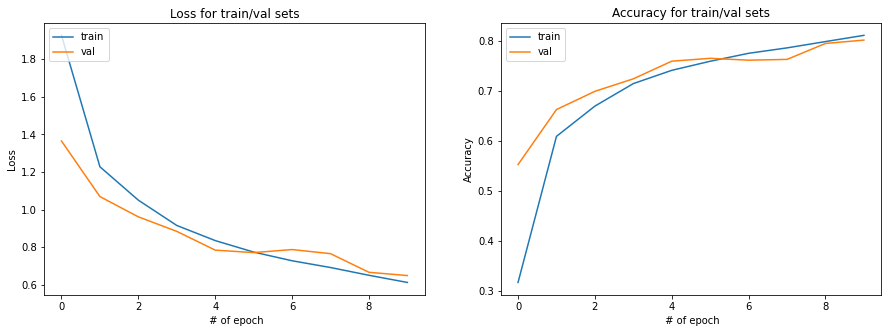

Model Accuracy is :  80.10784387588501


In [32]:
model = NN_model(10, activation='relu', initializer='he_normal', optimizer='SGD')
print('Model Accuracy is : ', model[1][1]*100) 

# Deductions:
- he_normal intializer seems to giving slightly better results when compared to Xavier intializer for this dataset
- Both with SGD and Adam optimizer, the results almost similar. Hence we will continue to use both optimizers. 
- Notice, both SGD & Adam are performing better for different learning rates.  SGD at lr=0.01 and Adam at lr=0.001 are giving an accuracy ~ 80%
- We will however try to perform tuning to identify the best learning rate. 

# 2. Hyper parameters Tuning (finding best lr)

### a. for model with SGD optimizer

##### to evaluate the range for learning rate and lambda let us try with a very small value, followed by a very high values.

Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2.4221 - accuracy: 0.0958 - val_loss: 2.3572 - val_accuracy: 0.0973
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3412 - accuracy: 0.0962 - val_loss: 2.3283 - val_accuracy: 0.0960
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3221 - accuracy: 0.0952 - val_loss: 2.3161 - val_accuracy: 0.0959
Epoch 4/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3132 - accuracy: 0.0967 - val_loss: 2.3097 - val_accuracy: 0.0978
Epoch 5/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3080 - accuracy: 0.0999 - val_loss: 2.3056 - val_accuracy: 0.1027
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3047 - accuracy: 0.1042 - val_loss: 2.3031 - val_accuracy: 0.1080
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.1086 - val_loss: 2.3012 - val_accuracy: 0.1109
Epoch 

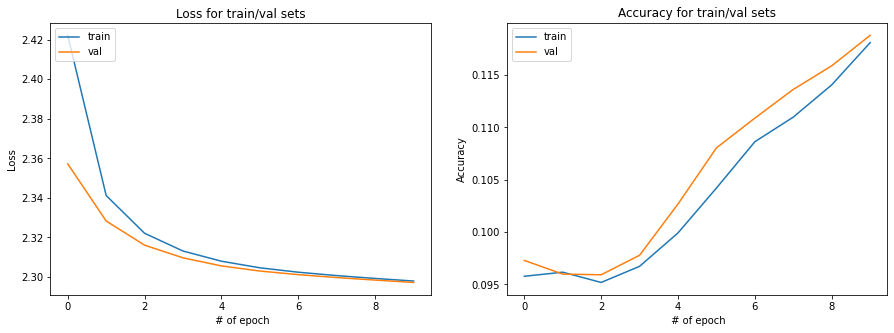

Model Accuracy is :  11.879085004329681


In [34]:
## small values for lr and lambda

model = NN_model(10, lr=1e-5, activation='relu', initializer='he_normal')
print('Model Accuracy is : ', model[1][1]*100) 

Epoch 1/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3076 - accuracy: 0.1052 - val_loss: 2.3016 - val_accuracy: 0.0983
Epoch 2/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1079 - val_loss: 2.3030 - val_accuracy: 0.1012
Epoch 3/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3036 - accuracy: 0.1025 - val_loss: 2.3044 - val_accuracy: 0.0987
Epoch 4/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3038 - accuracy: 0.0996 - val_loss: 2.3034 - val_accuracy: 0.0993
Epoch 5/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3036 - accuracy: 0.1002 - val_loss: 2.3033 - val_accuracy: 0.0991
Epoch 6/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3035 - accuracy: 0.1014 - val_loss: 2.3028 - val_accuracy: 0.1025
Epoch 7/10
357/357 [==============================] - 1s 4ms/step - loss: 2.3039 - accuracy: 0.0986 - val_loss: 2.3042 - val_accuracy: 0.0987
Epoch 

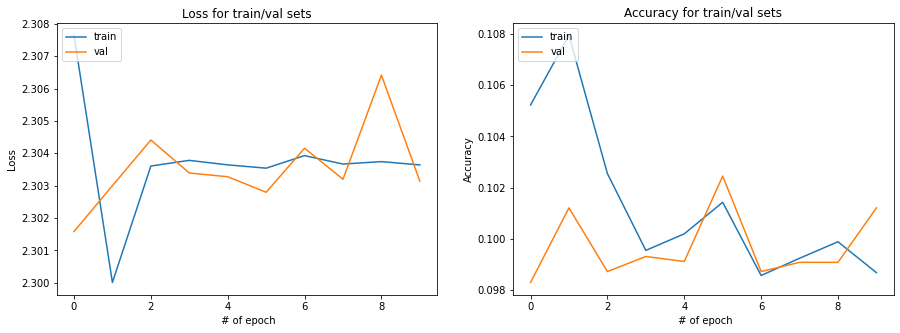

Model Accuracy is :  10.120914876461029


In [37]:
## Large values for lr 
## By trail and error we see the below values as optimal values beyond which the loss is imploding.

model = NN_model(10, lr=1e-1, activation='relu', initializer='he_normal')
print('Model Accuracy is : ', model[1][1]*100) 

**Now that we have set out lower and upper boundaries for our lr, lets now try to perform a random search in this range to find best lr**

In [38]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, -1.0))
    best_acc = NN_model(50, lr,activation='relu', initializer='he_normal', verb=False, plot=False)
    print("Try {0}: Best_val_acc: {1}, lr: {2}\n".format(k, best_acc[1][1]*100, lr))



Try 1: Best_val_acc: 84.99346375465393, lr: 0.0018857678301793107



Try 2: Best_val_acc: 73.18300604820251, lr: 0.00025510221239060803



Try 3: Best_val_acc: 22.17646986246109, lr: 1.3186920243969162e-05



Try 4: Best_val_acc: 83.31372737884521, lr: 0.0009599523391351702



Try 5: Best_val_acc: 87.63071894645691, lr: 0.007378788298648325



Try 6: Best_val_acc: 85.64705848693848, lr: 0.0016303201623112103



Try 7: Best_val_acc: 74.75163340568542, lr: 0.0003413004195982418



Try 8: Best_val_acc: 72.50000238418579, lr: 0.00027197090880608905



Try 9: Best_val_acc: 84.27451252937317, lr: 0.03859459714415712



We notice Try2, Try 5 & Try 6  where lr in the range 0.001 - 0.1


So, we now perform a more fine search for lr using the above range. 

In [42]:
for k in range(1,11):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    best_acc = NN_model(50, lr, activation='relu', initializer='he_normal', verb=False, plot=False)
    print("Try {0}: Best_val_acc: {1}, lr: {2}\n".format(k, best_acc[1][1]*100, lr))

Try 1: Best_val_acc: 87.26470470428467, lr: 0.0023385137255781405

Try 2: Best_val_acc: 87.18300461769104, lr: 0.03918927926323969

Try 3: Best_val_acc: 10.120914876461029, lr: 0.06294700927650036

Try 4: Best_val_acc: 87.26143836975098, lr: 0.014183582825128025

Try 5: Best_val_acc: 9.908496588468552, lr: 0.056050588869246264

Try 6: Best_val_acc: 88.46405148506165, lr: 0.013683212996770144

Try 7: Best_val_acc: 9.777777642011642, lr: 0.032487736397615846

Try 8: Best_val_acc: 88.20261359214783, lr: 0.010002103083042314

Try 9: Best_val_acc: 9.986928105354309, lr: 0.07310599547111442

Try 10: Best_val_acc: 87.84967064857483, lr: 0.005402612453678929



### b. for model with Adam optimizer


In [43]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, -1.0))
    best_acc = NN_model(50, lr,activation='relu', optimizer='adam', initializer='he_normal', verb=False, plot=False)
    print("Try {0}: Best_val_acc: {1}, lr: {2}\n".format(k, best_acc[1][1]*100, lr))

Try 1: Best_val_acc: 76.18627548217773, lr: 1.3470348116218704e-05

Try 2: Best_val_acc: 10.120914876461029, lr: 0.03769082949147512

Try 3: Best_val_acc: 74.15032386779785, lr: 1.1567926220155702e-05

Try 4: Best_val_acc: 82.87908434867859, lr: 4.292063214243281e-05

Try 5: Best_val_acc: 10.12418270111084, lr: 0.02533837772583016

Try 6: Best_val_acc: 63.73856067657471, lr: 0.010198612985543717

Try 7: Best_val_acc: 88.17647099494934, lr: 0.0010116038367320433

Try 8: Best_val_acc: 9.931372851133347, lr: 0.044861879638427124

Try 9: Best_val_acc: 9.777777642011642, lr: 0.016271434160886306



**Based on the above search we will use lr=0.002 for both SGD & Adam optimizer**   

#3. Implementing Batch normalization

In [0]:
from tensorflow.keras.layers import BatchNormalization, Dropout

batch_model = Sequential()
batch_model.add(Dense(500, kernel_initializer='he_normal',input_shape=(1024,)))
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))

batch_model.add(Dense(250, kernel_initializer='he_normal'))
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))


batch_model.add(Dense(100, kernel_initializer='he_normal'))
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))

batch_model.add(Dense(50, kernel_initializer='he_normal'))
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))


batch_model.add(Dense(10, activation='softmax'))

In [0]:
## optimizer 1
sgd = optimizers.SGD(lr=0.002,decay=1e-6, momentum=0.9)

## optimizer 2
adam = optimizers.Adam(lr = 0.002)

#### a. With SGD optimizer

In [0]:
# Compile model
batch_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
#my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.0001,patience=3,restore_best_weights=True)]    

Epoch 1/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.5778 - val_accuracy: 0.9048
Epoch 2/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.6462 - val_accuracy: 0.8885
Epoch 3/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.5409 - val_accuracy: 0.9155
Epoch 4/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.5400 - val_accuracy: 0.9135
Epoch 5/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.5984 - val_accuracy: 0.9040
Epoch 6/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.5651 - val_accuracy: 0.9101
Epoch 7/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.5476 - val_accuracy: 0.9148

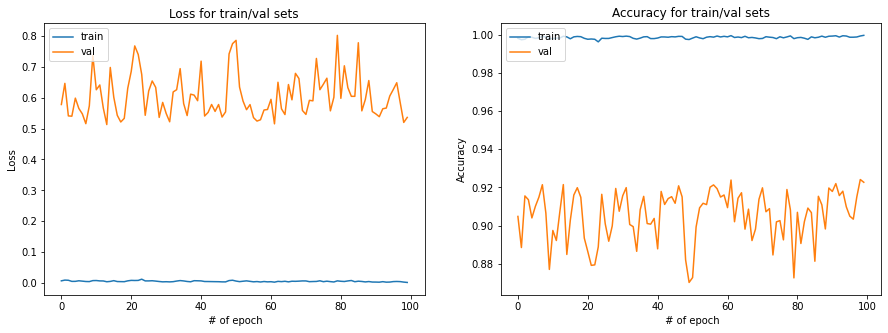

In [136]:
# Fit the model
history = batch_model.fit(Xf_tr, yf_tr, epochs=100, batch_size=200, validation_data=(Xf_va,yf_va), verbose=1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_loss(history)

plt.subplot(1,2,2)
plot_accuracy(history)

scores = batch_model.evaluate(Xf_va, yf_va)
print("Model accuracy with batch normalization: ", scores[1]*100)

***Looks like our model is overfiiting as we see from the difference in loss/accuracy between train & validation sets.***

#### b. With Adam optimizer

In [0]:
# Compile model
batch_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
#my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.0001,patience=3,restore_best_weights=True)]  

Epoch 1/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.7299 - val_accuracy: 0.8566
Epoch 2/100
357/357 [==============================] - 2s 4ms/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.8827 - val_accuracy: 0.8341
Epoch 3/100
357/357 [==============================] - 2s 4ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.6224 - val_accuracy: 0.8748
Epoch 4/100
357/357 [==============================] - 2s 4ms/step - loss: 0.0232 - accuracy: 0.9935 - val_loss: 0.8342 - val_accuracy: 0.8366
Epoch 5/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0201 - accuracy: 0.9943 - val_loss: 0.5862 - val_accuracy: 0.8833
Epoch 6/100
357/357 [==============================] - 2s 4ms/step - loss: 0.0238 - accuracy: 0.9935 - val_loss: 0.5433 - val_accuracy: 0.8940
Epoch 7/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.7038 - val_accuracy: 0.8678

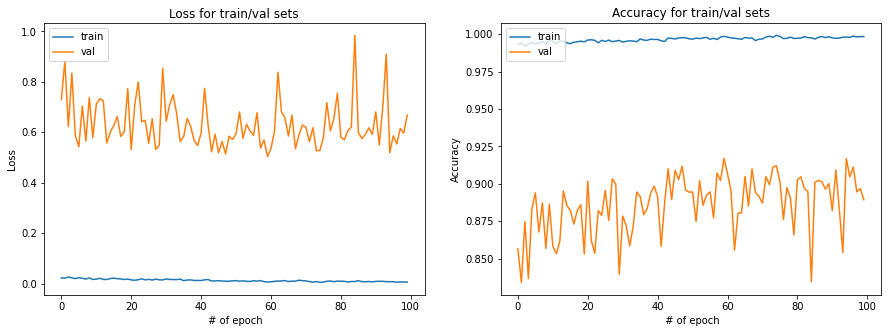

In [48]:
# Fit the model
history = batch_model.fit(Xf_tr, yf_tr, epochs=100, batch_size=200, validation_data=(Xf_va,yf_va), verbose=1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_loss(history)

plt.subplot(1,2,2)
plot_accuracy(history)

scores = batch_model.evaluate(Xf_va, yf_va)
print("Model accuracy with batch normalization: ", scores[1]*100)

***Again, we notice our model is overfitting***

# 4. Reducing overfitting  

We use two methods to reduce overfitting  
a. using L2 regularization Lambda  
b. using dropout  

#### a. Using L2 regularization parameter Lambda

In [0]:
def reg_model(X=Xf_tr,y=yf_tr,optimizer='SGD', Lambda=1e-2, verb=True):
  
  #parameters
  Lambda = Lambda
  opt_algo = optimizer
  verbose=0

  if(verb):
    verbose = 1
  reg_model = Sequential()
  reg_model.add(Dense(500, kernel_initializer='he_normal',input_shape=(1024,)))
  reg_model.add(BatchNormalization())
  reg_model.add(Activation('relu'))

  reg_model.add(Dense(250, kernel_initializer='he_normal'))
  reg_model.add(BatchNormalization())
  reg_model.add(Activation('relu'))

  reg_model.add(Dense(100, kernel_initializer='he_normal'))
  reg_model.add(BatchNormalization())
  reg_model.add(Activation('relu'))

  reg_model.add(Dense(50, kernel_initializer='he_normal'))
  reg_model.add(BatchNormalization())
  reg_model.add(Activation('relu'))

  reg_model.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(Lambda)))

  ## optimizer 1
  sgd = optimizers.SGD(lr=0.002,decay=1e-6, momentum=0.9)

  ## optimizer 2
  adam = optimizers.Adam(lr = 0.002)

  if(opt_algo == 'SGD'):
    opt_algo = sgd
  else:
    opt_algo = adam

  reg_model.compile(loss='categorical_crossentropy', optimizer=opt_algo, metrics=['accuracy'])

  history = reg_model.fit(X, y, epochs=100, batch_size=200, validation_data=(Xf_va,yf_va), verbose=verbose)

  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plot_loss(history)

  plt.subplot(1,2,2)
  plot_accuracy(history)

  scores = batch_model.evaluate(Xf_va, yf_va)
  print("Model accuracy with batch normalization & regularization of {0} is {1}: ".format(Lambda, scores[1]*100))


Epoch 1/100
357/357 [==============================] - 2s 5ms/step - loss: 2.6647 - accuracy: 0.3240 - val_loss: 2.1568 - val_accuracy: 0.4288
Epoch 2/100
357/357 [==============================] - 2s 4ms/step - loss: 1.8977 - accuracy: 0.5340 - val_loss: 1.7835 - val_accuracy: 0.5614
Epoch 3/100
357/357 [==============================] - 2s 5ms/step - loss: 1.6415 - accuracy: 0.6202 - val_loss: 1.5913 - val_accuracy: 0.6261
Epoch 4/100
357/357 [==============================] - 2s 4ms/step - loss: 1.4603 - accuracy: 0.6820 - val_loss: 1.4650 - val_accuracy: 0.6757
Epoch 5/100
357/357 [==============================] - 2s 5ms/step - loss: 1.3207 - accuracy: 0.7247 - val_loss: 1.3309 - val_accuracy: 0.7161
Epoch 6/100
357/357 [==============================] - 2s 4ms/step - loss: 1.2089 - accuracy: 0.7564 - val_loss: 1.2821 - val_accuracy: 0.7152
Epoch 7/100
357/357 [==============================] - 2s 4ms/step - loss: 1.1186 - accuracy: 0.7795 - val_loss: 1.2363 - val_accuracy: 0.7262

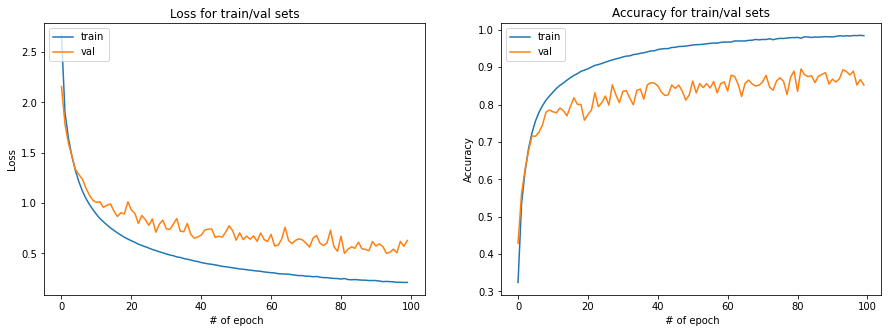

In [55]:
#try 1
# with Lambda = 1e-2 & optimizer as SGD

#try 2 
# with Lambda = 1e-1 & optimizer as SGD
reg_model(Lambda=1e-1)


***We notice, the delta between the train loss & val_loss with lambda = 1e-1 has come down significantly, for model with batch normalization and SGD optimize***  

**This indicates were able to reduce overfiiting of our model.**

for model with Adam optimizer

957/957 [==============================] - 2s 2ms/step - loss: 0.6677 - accuracy: 0.8895
Model accuracy with batch normalization:  88.94771337509155


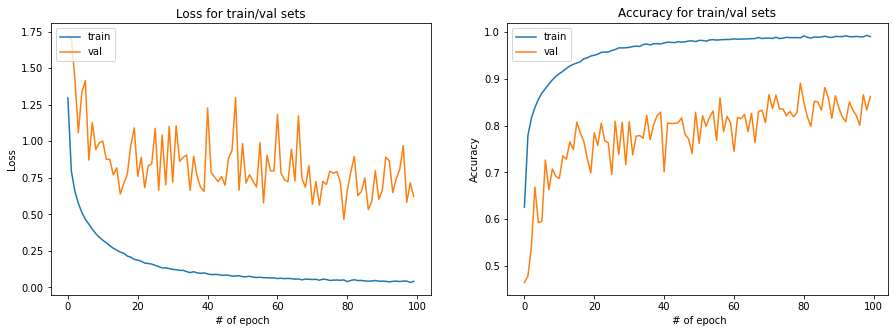

In [57]:
#try 1
# with Lambda = 1e-2 & optimizer as Adam
reg_model(Lambda=1e-2, optimizer='adam', verb=False)


957/957 [==============================] - 2s 2ms/step - loss: 0.6677 - accuracy: 0.8895
Model accuracy with batch normalization & regularization of 0.1 is 88.94771337509155: 


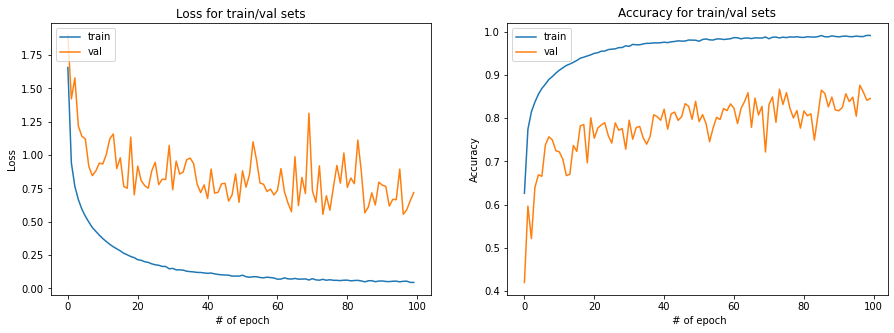

In [62]:
#try 2 
# with Lambda = 1e-1 & optimizer as Adam
reg_model(Lambda=1e-1, optimizer='adam', verb=False)

***In comparsion to the model with batch normalization & Adam optimizer, the overfitting is significantly reduced as noticed by difference between train & val loss*** 

### b. using dropout

In [0]:
def drop_model(X=Xf_tr, y=yf_tr, dropout=0.2, optimizer='SGD', verb=True):
    
    #parameters
    dropout = dropout
    opt_algo = optimizer
    verbose = 0

    model = Sequential()
    
    model.add(Dense(500, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(250, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(dropout))

    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    ## optimizer 1
    sgd = optimizers.SGD(lr=0.002,decay=1e-6, momentum=0.9)

    ## optimizer 2
    adam = optimizers.Adam(lr = 0.002)

    if(opt_algo == 'SGD'):
      opt_algo = sgd
    else:
      opt_algo = adam
    
    if(verb):
      verbose=1

    model.compile(optimizer = opt_algo, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(X, y, epochs=100, batch_size=200, validation_data=(Xf_va,yf_va), verbose=verbose)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plot_loss(history)

    plt.subplot(1,2,2)
    plot_accuracy(history)

    scores = model.evaluate(Xf_va, yf_va)
    print("Model accuracy with batch normalization & dropout of {0} is {1}: ".format(dropout, scores[1]*100))


957/957 [==============================] - 2s 2ms/step - loss: 0.4005 - accuracy: 0.8772
Model accuracy with batch normalization & dropout of 0.2 is 87.71895170211792: 


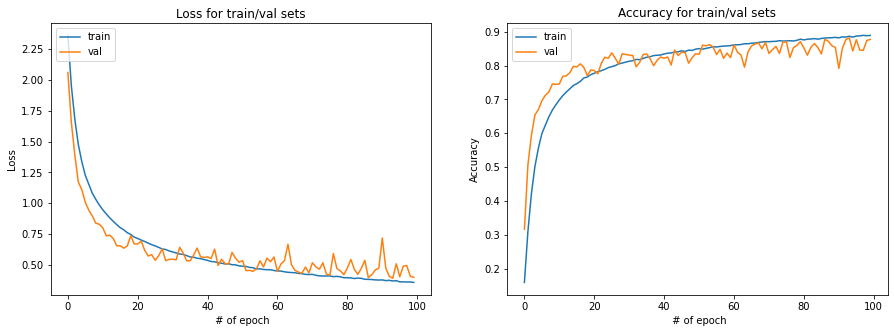

In [70]:
# dropot = 0.2 & optimizer = SGD

drop_model(verb=False)

957/957 [==============================] - 2s 2ms/step - loss: 0.5191 - accuracy: 0.8401
Model accuracy with batch normalization & dropout of 0.3 is 84.00653600692749: 


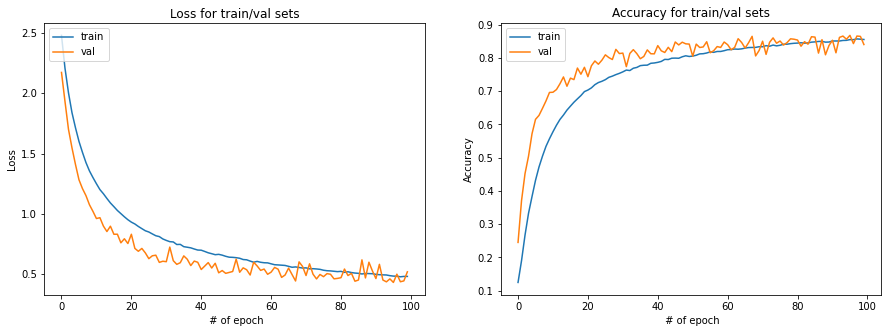

In [72]:
# dropot = 0.3 & optimizer = SGD

drop_model(dropout=0.3, verb=False)

957/957 [==============================] - 2s 2ms/step - loss: 0.4858 - accuracy: 0.8498
Model accuracy with batch normalization & dropout of 0.2 is 84.977126121521: 


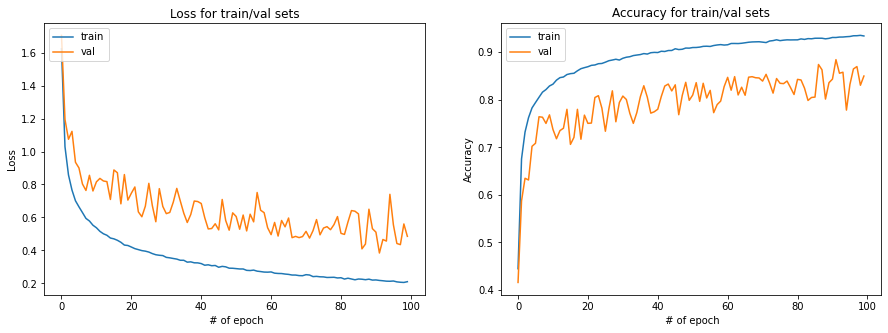

In [73]:
# dropout = 0.2 and optimizer = 'adam'
drop_model(dropout=0.2, optimizer='adam', verb=False)

957/957 [==============================] - 2s 2ms/step - loss: 0.5133 - accuracy: 0.8392
Model accuracy with batch normalization & dropout of 0.3 is 83.92156958580017: 


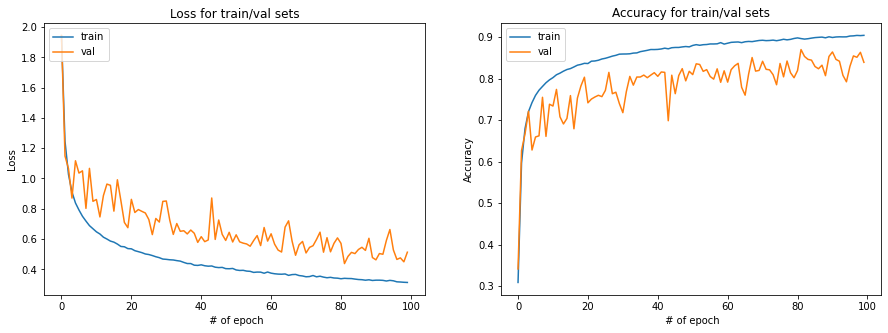

In [74]:
# dropout = 0.3 and optimizer = 'adam'
drop_model(dropout=0.3, optimizer='adam', verb=False)

# Deductions: 
- For the given dataset, SGD perform better, hence we choose SGD for our final model
- A dropout of 0.2 with batch normalization gives good results. Hence we choose dropout = 0.2
- We will use a L2 regularization with Lambda = 0.1
- And we already have our optimal learning rate = 0.002


# 5. Final Model

In [0]:
def final_model():

  #parameters
  dropout=0.2
  Lambda=0.1
  
  model = Sequential()
  
  model.add(Dense(500, input_shape = (1024, ), kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(250, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))    
  model.add(Dropout(dropout))

  model.add(Dense(100, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(50, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(Lambda)))
  
  sgd = optimizers.SGD(lr=0.002,decay=1e-6, momentum=0.9)

  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [108]:
model = final_model()
history = model.fit(Xf_tr, yf_tr, epochs=100, batch_size=200, validation_data=(Xf_va, yf_va), 
                    verbose=1,callbacks=[callbacks.ModelCheckpoint('best.h5',save_best_only=True)])

model.load_weights('best.h5')

Epoch 1/100
357/357 [==============================] - 2s 5ms/step - loss: 2.8374 - accuracy: 0.1530 - val_loss: 2.3132 - val_accuracy: 0.2843
Epoch 2/100
357/357 [==============================] - 2s 5ms/step - loss: 2.2443 - accuracy: 0.2353 - val_loss: 2.1538 - val_accuracy: 0.3259
Epoch 3/100
357/357 [==============================] - 2s 5ms/step - loss: 2.1341 - accuracy: 0.2899 - val_loss: 2.0068 - val_accuracy: 0.3929
Epoch 4/100
357/357 [==============================] - 2s 5ms/step - loss: 2.0343 - accuracy: 0.3402 - val_loss: 1.9050 - val_accuracy: 0.4502
Epoch 5/100
357/357 [==============================] - 2s 5ms/step - loss: 1.9465 - accuracy: 0.3903 - val_loss: 1.8127 - val_accuracy: 0.5009
Epoch 6/100
357/357 [==============================] - 2s 5ms/step - loss: 1.8658 - accuracy: 0.4369 - val_loss: 1.7341 - val_accuracy: 0.5460
Epoch 7/100
357/357 [==============================] - 2s 5ms/step - loss: 1.7895 - accuracy: 0.4762 - val_loss: 1.6253 - val_accuracy: 0.5710

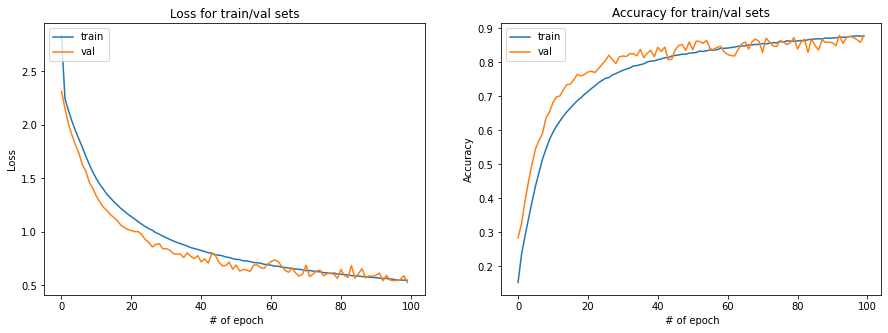



957/957 [==============================] - 2s 2ms/step - loss: 0.5270 - accuracy: 0.8794
Model accuracy with SGD, batch normalization, dropout=0.2 & Lambda = 0.1 is :  87.9444420337677


In [109]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_loss(history)

plt.subplot(1,2,2)
plot_accuracy(history)
plt.show()

print("\n")

scores = model.evaluate(Xf_va, yf_va)
print("Model accuracy with SGD, batch normalization, dropout=0.2 & Lambda = 0.1 is : ", scores[1]*100)

## a. Test Accuracy

In [110]:
test_scores = model.evaluate(X_te, y_te)
print(" Accuracy on test set is : ",test_scores[1]*100)

563/563 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.8852
 Accuracy on test set is :  88.52221965789795


## b. Predictions

In [0]:
predictions = np.argmax(model.predict(X_te), axis=-1)

In [113]:
predictions[:5]

array([1, 7, 2, 9, 0])

## c. Confusion Matrix

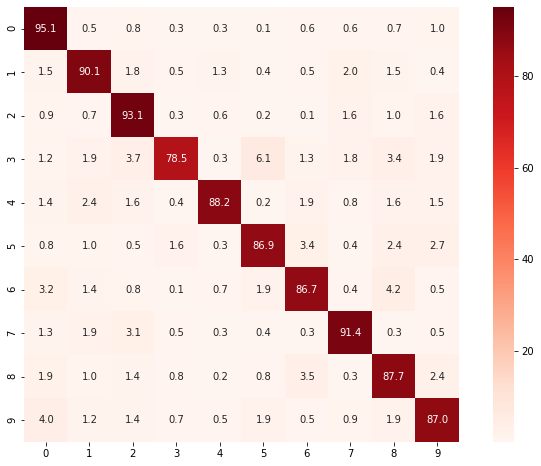

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_te, axis=1), y_pred=predictions)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);


## d. Visualizing Model predictions

Plotting Incorrectly classifed images

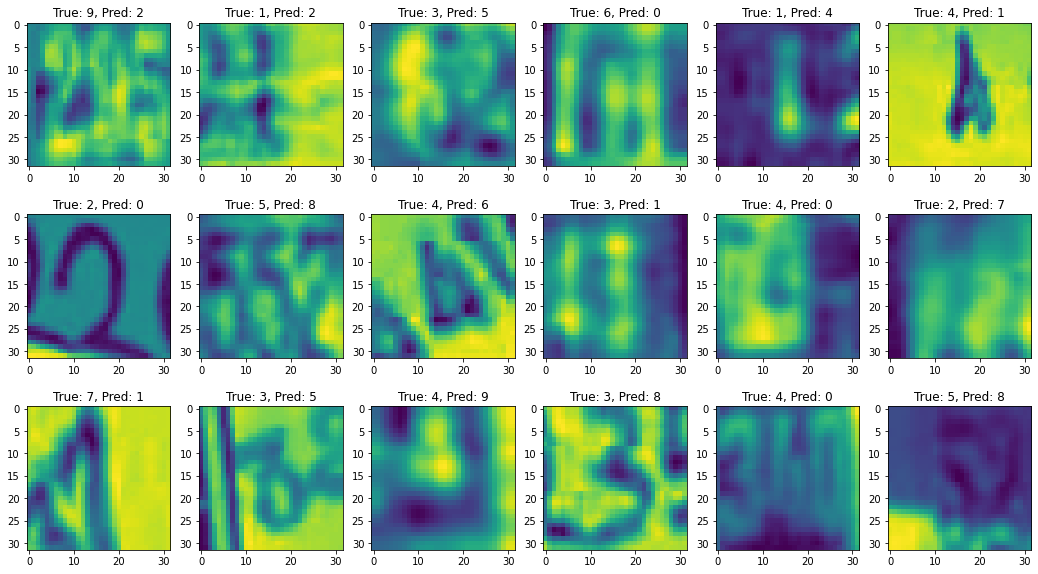

In [134]:
# Find the incorrectly classified examples
incorrect = predictions != np.argmax(y_te, axis=1)

# Select the incorrectly classified examples
images = X_test[incorrect]

true_class = y_test[incorrect]
pred_class = predictions[incorrect]

# Plot the mis-classified examples

fig=plt.figure(figsize=(18, 10))
columns=6
rows=3
for i in range(1, columns*rows +1):
    img = images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title("True: {0}, Pred: {1}".format(true_class[i], pred_class[i]))
plt.show()

PLotting correclty classified images

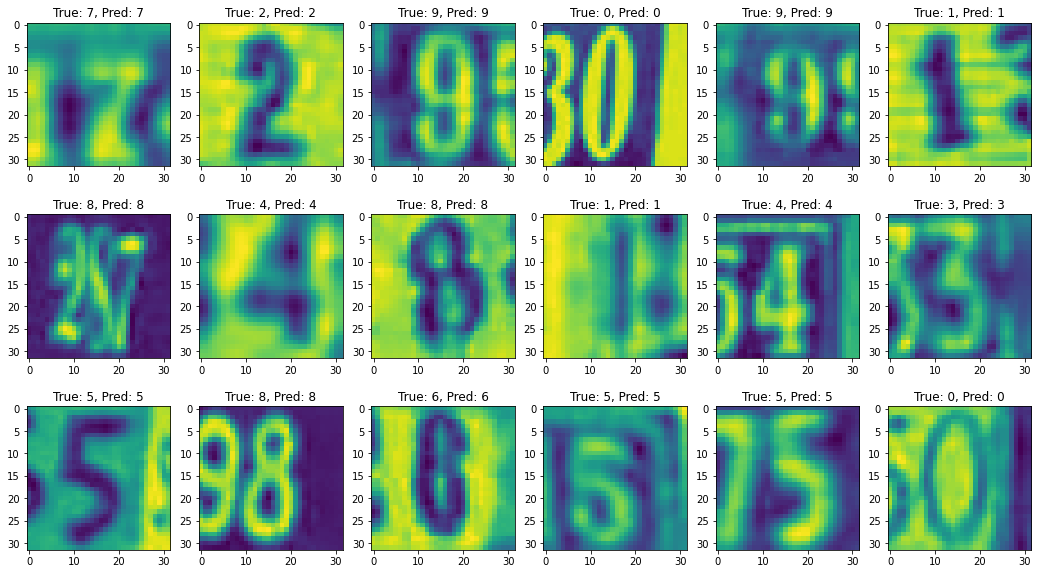

In [135]:
correct = np.invert(incorrect)

# Select the correctly classified examples
images = X_test[correct]
true_class = y_test[correct]
pred_class = predictions[correct]

fig=plt.figure(figsize=(18, 10))
columns=6
rows=3
for i in range(1, columns*rows +1):
    img = images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title("True: {0}, Pred: {1}".format(true_class[i], pred_class[i]))
plt.show()